In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [117]:
# 출력 옵션 변경
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 100)

In [118]:
# 2008 ~ 2018년 수질 데이터
dfw_all = pd.read_excel('../data/water_2009_2018_preprocessed.xlsx', sheet_name = None, engine='openpyxl');
df = pd.concat(dfw_all, ignore_index=True);

In [119]:
df.shape

(52679, 66)

In [120]:
# 필요없는 컬럼 drop
df.drop(['시설명', '소재지', '수원', '채수년월일'], axis=1, inplace=True)

In [121]:
# dtype 확인 - object: 총대장균, 대장균, 냄새, 맛
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52679 entries, 0 to 52678
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   검사월                                     52679 non-null  object 
 1   수도사업자                                   52679 non-null  object 
 2   시설용량(㎥/일)                               52679 non-null  int64  
 3   일반세균(기준:100/ 단위:(CFU/mL))               52679 non-null  int64  
 4   총대장균군(기준:0/ 단위:MPN)                     52679 non-null  object 
 5   대장균/분원성대장균군(기준:0/ 단위:MPN)               52679 non-null  object 
 6   납(기준:0.01/ 단위:(mg/L))                   52632 non-null  float64
 7   불소(기준:1.5/ 단위:(mg/L))                   52679 non-null  float64
 8   비소(기준:0.01/ 단위:(mg/L))                  52632 non-null  float64
 9   셀레늄(기준:0.01/ 단위:(mg/L))                 52632 non-null  float64
 10  수은(기준:0.001/ 단위:(mg/L))                 52632 non-null  fl

In [122]:
# '납(기준:0.05/ 단위:(mg/L))', '비소(기준:0.05/ 단위:(mg/L))', '망간(기준:0.3/ 단위:(mg/L))'은 컬럼명이 달라 엑셀에서 컬럼명을 통일
#'1,4-다이옥산(기준:0.05/ 단위:(mg/L))'은 2010년 부터, '브롬산염(기준:0.01/ 단위:(mg/L))'는 2017년 부터, '포름알데히드(기준:0.5/ 단위:(mg/L))'는 2014년 부터 측정하여 컬럼 제거
df = df.drop(['1,4-다이옥산(기준:0.05/ 단위:(mg/L))', '브롬산염(기준:0.01/ 단위:(mg/L))', '포름알데히드(기준:0.5/ 단위:(mg/L))'], axis=1)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52679 entries, 0 to 52678
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   검사월                                     52679 non-null  object 
 1   수도사업자                                   52679 non-null  object 
 2   시설용량(㎥/일)                               52679 non-null  int64  
 3   일반세균(기준:100/ 단위:(CFU/mL))               52679 non-null  int64  
 4   총대장균군(기준:0/ 단위:MPN)                     52679 non-null  object 
 5   대장균/분원성대장균군(기준:0/ 단위:MPN)               52679 non-null  object 
 6   납(기준:0.01/ 단위:(mg/L))                   52632 non-null  float64
 7   불소(기준:1.5/ 단위:(mg/L))                   52679 non-null  float64
 8   비소(기준:0.01/ 단위:(mg/L))                  52632 non-null  float64
 9   셀레늄(기준:0.01/ 단위:(mg/L))                 52632 non-null  float64
 10  수은(기준:0.001/ 단위:(mg/L))                 52632 non-null  fl

In [124]:
# 총대장균, 대장균 컬럼(8~9열)에서 '불검출' 개수 확인하여 많으면 컬럼을 삭제하도록 함
# df.iloc[:, 8].value_counts()
# df.iloc[:, 9].value_counts()

# 위 두 컬럼은 제외
df = df.drop(['총대장균군(기준:0/ 단위:MPN)', '대장균/분원성대장균군(기준:0/ 단위:MPN)'], axis=1)
df.head(2)

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,2009-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76,1.1,적합,적합,0.01,3,0.0,7.3,0.0,15.0,97,0.0,0.0,0.04,9,0.03,0.004,0.60,0.0023,0.0008,0.0,0.0000,0.0,0.0043,0.0017,0.0
1,2009-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63,1.3,적합,적합,0.00,0,0.0,7.4,0.0,13.0,102,0.0,0.0,0.05,16,0.02,0.008,0.45,0.0054,0.0025,0.0,0.0005,0.0,0.0086,0.0029,0.0


In [125]:
# 냄새, 맛 컬럼
# df.loc[:, '냄새(기준:0/ 단위:(mg/L))'].value_counts()   
# df.loc[:, '맛(기준:0/ 단위:(mg/L))'].value_counts()        # 모두 적합이므로 컬럼 삭제

df = df.drop(['냄새(기준:0/ 단위:(mg/L))', '맛(기준:0/ 단위:(mg/L))'], axis=1)
df.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,2009-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76,1.1,0.010,3,0.0,7.3,0.000,15.0,97,0.0,0.0,0.04,9,0.03,0.004,0.60,0.0023,0.0008,0.0,0.0000,0.0,0.0043,0.0017,0.0
1,2009-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63,1.3,0.000,0,0.0,7.4,0.000,13.0,102,0.0,0.0,0.05,16,0.02,0.008,0.45,0.0054,0.0025,0.0,0.0005,0.0,0.0086,0.0029,0.0
2,2009-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65,1.1,0.009,0,0.0,7.3,0.002,14.0,114,0.0,0.0,0.05,13,0.02,0.005,0.56,0.0030,0.0020,0.0,0.0007,0.0,0.0088,0.0021,0.0
3,2009-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71,1.4,0.000,0,0.0,7.4,0.003,22.0,97,0.0,0.0,0.04,15,0.02,0.003,0.50,0.0023,0.0015,0.0,0.0000,0.0,0.0047,0.0010,0.0
4,2009-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,1.4,0.000,0,0.0,7.3,0.000,17.0,95,0.0,0.0,0.05,19,0.04,0.006,0.59,0.0039,0.0040,0.0,0.0013,0.0,0.0130,0.0022,0.0


In [126]:
df.shape

(52679, 55)

In [127]:
# 탁도 단위(NTU)의 호환성 때문에 컬럼 drop
df.drop('탁도(기준:0.5/ 단위:(NTU))', axis=1, inplace=True)
df.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,2009-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76,1.1,0.010,3,0.0,7.3,0.000,15.0,97,0.0,0.0,9,0.03,0.004,0.60,0.0023,0.0008,0.0,0.0000,0.0,0.0043,0.0017,0.0
1,2009-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63,1.3,0.000,0,0.0,7.4,0.000,13.0,102,0.0,0.0,16,0.02,0.008,0.45,0.0054,0.0025,0.0,0.0005,0.0,0.0086,0.0029,0.0
2,2009-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65,1.1,0.009,0,0.0,7.3,0.002,14.0,114,0.0,0.0,13,0.02,0.005,0.56,0.0030,0.0020,0.0,0.0007,0.0,0.0088,0.0021,0.0
3,2009-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71,1.4,0.000,0,0.0,7.4,0.003,22.0,97,0.0,0.0,15,0.02,0.003,0.50,0.0023,0.0015,0.0,0.0000,0.0,0.0047,0.0010,0.0
4,2009-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,1.4,0.000,0,0.0,7.3,0.000,17.0,95,0.0,0.0,19,0.04,0.006,0.59,0.0039,0.0040,0.0,0.0013,0.0,0.0130,0.0022,0.0


* 탁도: NTU --> SiO2 ppm (1mg/1L)  -->  단위 환산의 부정확성 때문에 drop
* 색도 1도: 백금 1㎎이 물 1L에 용해되어 있을 때 나타나는 색  -->  mg/L이므로 계산에 문제 없음
* 나중에 분석이 다 끝나고 나면 컬럼명을 간단하게 바꾸는 것이 좋을 수도 있을 듯!

In [128]:
df.shape

(52679, 54)

In [129]:
df = df.dropna(axis=0) 
df.isnull().sum()

검사월                                       0
수도사업자                                     0
시설용량(㎥/일)                                 0
일반세균(기준:100/ 단위:(CFU/mL))                 0
납(기준:0.01/ 단위:(mg/L))                     0
불소(기준:1.5/ 단위:(mg/L))                     0
비소(기준:0.01/ 단위:(mg/L))                    0
셀레늄(기준:0.01/ 단위:(mg/L))                   0
수은(기준:0.001/ 단위:(mg/L))                   0
시안(기준:0.01/ 단위:(mg/L))                    0
크롬(기준:0.05/ 단위:(mg/L))                    0
암모니아성질소(기준:0.5/ 단위:(mg/L))                0
질산성질소(기준:10/ 단위:(mg/L))                   0
카드뮴(기준:0.005/ 단위:(mg/L))                  0
붕소(기준:1/ 단위:(mg/L))                       0
페놀(기준:0.005/ 단위:(mg/L))                   0
다이아지논(기준:0.02/ 단위:(mg/L))                 0
파라티온(기준:0.06/ 단위:(mg/L))                  0
1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))    0
페니트로티온(기준:0.04/ 단위:(mg/L))                0
카바릴(기준:0.07/ 단위:(mg/L))                   0
1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))          0
테트라클로로에틸렌(기준:0.01/ 단위:(mg/L))   

In [130]:
df.shape

(52031, 54)

In [131]:
# 0을 NaN로 바꾸고 결측치 개수 = 행 개수(4985)인 경우만 drop하기 
df.replace(0, np.nan, inplace=True)

# 모든 컬럼에 대하여 결측치 개수 확인
nan_num = df.isnull().sum()                        # 결측치 수
drop_list = list(nan_num[nan_num == len(df)].index)   # drop할 컬럼명 list (5개 항목)
water = df.drop(drop_list, axis=1)                 # 수질 전처리 파일명: water 

In [132]:
water.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,2009-01,서울특별시,1000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1.1,0.010,3.0,NaN,7.3,NaN,15.0,97.0,NaN,NaN,9.0,0.03,0.004,0.60,0.0023,0.0008,NaN,NaN,NaN,0.0043,0.0017,NaN
1,2009-01,서울특별시,400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,1.3,NaN,NaN,NaN,7.4,NaN,13.0,102.0,NaN,NaN,16.0,0.02,0.008,0.45,0.0054,0.0025,NaN,0.0005,NaN,0.0086,0.0029,NaN
2,2009-01,서울특별시,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,1.1,0.009,NaN,NaN,7.3,0.002,14.0,114.0,NaN,NaN,13.0,0.02,0.005,0.56,0.0030,0.0020,NaN,0.0007,NaN,0.0088,0.0021,NaN
3,2009-01,서울특별시,700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,1.4,NaN,NaN,NaN,7.4,0.003,22.0,97.0,NaN,NaN,15.0,0.02,0.003,0.50,0.0023,0.0015,NaN,NaN,NaN,0.0047,0.0010,NaN
4,2009-01,서울특별시,1600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,1.4,NaN,NaN,NaN,7.3,NaN,17.0,95.0,NaN,NaN,19.0,0.04,0.006,0.59,0.0039,0.0040,NaN,0.0013,NaN,0.0130,0.0022,NaN


In [133]:
print(water.shape)
print(water.columns)

(52031, 53)
Index(['검사월', '수도사업자', '시설용량(㎥/일)', '일반세균(기준:100/ 단위:(CFU/mL))',
       '납(기준:0.01/ 단위:(mg/L))', '불소(기준:1.5/ 단위:(mg/L))',
       '비소(기준:0.01/ 단위:(mg/L))', '셀레늄(기준:0.01/ 단위:(mg/L))',
       '시안(기준:0.01/ 단위:(mg/L))', '크롬(기준:0.05/ 단위:(mg/L))',
       '암모니아성질소(기준:0.5/ 단위:(mg/L))', '질산성질소(기준:10/ 단위:(mg/L))',
       '카드뮴(기준:0.005/ 단위:(mg/L))', '붕소(기준:1/ 단위:(mg/L))',
       '페놀(기준:0.005/ 단위:(mg/L))', '다이아지논(기준:0.02/ 단위:(mg/L))',
       '파라티온(기준:0.06/ 단위:(mg/L))', '1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))',
       '페니트로티온(기준:0.04/ 단위:(mg/L))', '카바릴(기준:0.07/ 단위:(mg/L))',
       '1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))', '테트라클로로에틸렌(기준:0.01/ 단위:(mg/L))',
       '트리클로로에틸렌(기준:0.03/ 단위:(mg/L))', '디클로로메탄(기준:0.02/ 단위:(mg/L))',
       '벤젠(기준:0.01/ 단위:(mg/L))', '톨루엔(기준:0.7/ 단위:(mg/L))',
       '에틸벤젠(기준:0.3/ 단위:(mg/L))', '크실렌(기준:0.5/ 단위:(mg/L))',
       '1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))', '사염화탄소(기준:0.002/ 단위:(mg/L))',
       '경도(기준:300/ 단위:(mg/L))', '과망간산칼륨소비량(기준:10/ 단위:(mg/L))',
       '동(기준:1/ 단위:(mg

In [134]:
# 남은 NaN은 다시 0으로 되돌리기
water.fillna(0, inplace=True)
water

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,2009-01,서울특별시,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,1.1,0.010,3.0,0.0,7.3,0.000,15.0,97.0,0.0,0.0,9.0,0.03,0.004,0.60,0.0023,0.0008,0.0000,0.0000,0.0,0.0043,0.0017,0.000
1,2009-01,서울특별시,400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,1.3,0.000,0.0,0.0,7.4,0.000,13.0,102.0,0.0,0.0,16.0,0.02,0.008,0.45,0.0054,0.0025,0.0000,0.0005,0.0,0.0086,0.0029,0.000
2,2009-01,서울특별시,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,1.1,0.009,0.0,0.0,7.3,0.002,14.0,114.0,0.0,0.0,13.0,0.02,0.005,0.56,0.0030,0.0020,0.0000,0.0007,0.0,0.0088,0.0021,0.000
3,2009-01,서울특별시,700000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,1.4,0.000,0.0,0.0,7.4,0.003,22.0,97.0,0.0,0.0,15.0,0.02,0.003,0.50,0.0023,0.0015,0.0000,0.0000,0.0,0.0047,0.0010,0.000
4,2009-01,서울특별시,1600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,1.4,0.000,0.0,0.0,7.3,0.000,17.0,95.0,0.0,0.0,19.0,0.04,0.006,0.59,0.0039,0.0040,0.0000,0.0013,0.0,0.0130,0.0022,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52674,2018-10,충청북도 충주시,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,3.3,0.000,0.0,0.0,7.9,0.007,23.0,178.0,0.0,0.0,18.0,0.14,0.009,0.86,0.0070,0.0020,0.0005,0.0150,0.0,0.0580,0.0020,0.000
52675,2018-11,충청북도 충주시,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,1.4,0.000,0.0,0.0,7.8,0.000,22.0,183.0,0.0,0.0,16.0,0.06,0.000,0.77,0.0000,0.0017,0.0005,0.0082,0.0,0.0050,0.0000,0.000
52676,2018-11,충청북도 충주시,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,1.4,0.000,0.0,0.0,7.9,0.000,22.0,179.0,0.0,0.0,16.0,0.05,0.000,0.78,0.0000,0.0017,0.0006,0.0080,0.0,0.0100,0.0000,0.000
52677,2018-12,충청북도 충주시,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,1.4,0.000,0.0,0.0,7.7,0.000,41.0,182.0,0.0,0.0,16.0,0.05,0.017,0.70,0.0090,0.0016,0.0009,0.0047,0.0,0.0200,0.0060,0.002


In [135]:
water.rename({'수도사업자':'지역'}, axis=1, inplace=True)
water.head(2)

,검사월,지역,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,2009-01,서울특별시,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,1.1,0.01,3.0,0.0,7.3,0.0,15.0,97.0,0.0,0.0,9.0,0.03,0.004,0.60,0.0023,0.0008,0.0,0.0000,0.0,0.0043,0.0017,0.0
1,2009-01,서울특별시,400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,1.3,0.00,0.0,0.0,7.4,0.0,13.0,102.0,0.0,0.0,16.0,0.02,0.008,0.45,0.0054,0.0025,0.0,0.0005,0.0,0.0086,0.0029,0.0


In [136]:
# ['검사월']을 연도만 남기고 ['year']로 컬럼명 변경
water['검사월'] = water['검사월'].str[0:4]
water.rename({'검사월':'year'}, axis=1, inplace=True)

In [137]:
water = water[['지역','year','시설용량(㎥/일)','증발잔류물(기준:500/ 단위:(mg/L))', '알루미늄(기준:0.2/ 단위:(mg/L))', '색도(기준:5/ 단위:(도))', '디브로모아세토니트릴(기준:0.1/ 단위:(mg/L))', '과망간산칼륨소비량(기준:10/ 단위:(mg/L))', '염소이온(기준:250/ 단위:(mg/L))', '불소(기준:1.5/ 단위:(mg/L))', '디브로모클로로메탄(기준:0.1/ 단위:(mg/L))']]
water

,지역,year,시설용량(㎥/일),증발잔류물(기준:500/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,서울특별시,2009,1000000.0,97.0,0.03,3.0,0.0000,1.1,15.0,0.0,0.000
1,서울특별시,2009,400000.0,102.0,0.02,0.0,0.0000,1.3,13.0,0.0,0.000
2,서울특별시,2009,500000.0,114.0,0.02,0.0,0.0000,1.1,14.0,0.0,0.000
3,서울특별시,2009,700000.0,97.0,0.02,0.0,0.0000,1.4,22.0,0.0,0.000
4,서울특별시,2009,1600000.0,95.0,0.04,0.0,0.0000,1.4,17.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
52674,충청북도 충주시,2018,20000.0,178.0,0.14,0.0,0.0005,3.3,23.0,0.0,0.000
52675,충청북도 충주시,2018,35000.0,183.0,0.06,0.0,0.0005,1.4,22.0,0.0,0.000
52676,충청북도 충주시,2018,20000.0,179.0,0.05,0.0,0.0006,1.4,22.0,0.0,0.000
52677,충청북도 충주시,2018,35000.0,182.0,0.05,0.0,0.0009,1.4,41.0,0.0,0.002


* 수소이온농도(pH) = -log10[H+]

In [138]:
# Analysis
class fx:
    def waterQualByCity():
        '''
        각 지역별 1년 평균 물질 농도를 계산하여 dataframe을 반환하는 함수
        '''
        
        lst = []   # Dataframe 만들기 위해서 준비
        years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018']
        cities = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
        concs = water.columns[3:]
        
        for y in years:
            year = water['year'] == y
            water_y = water[year]
            for city in cities:
                ct_conc = [city + y]        # 하나의 도시에 대해, 이름과 모든 물질의 농도를 모은 리스트
                for conc in concs:
                    ct_water = water_y[water_y['지역'].str.contains(city)]
                    if conc == '일반세균(기준:100/ 단위:(CFU/mL))':
                        ct_water['월별물질농도(CFU/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * (10**6)
                        t_conc = ct_water['월별물질농도(CFU/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * (10**-6)  # 2018년, xx지역, 일반세균 평균 농도(CFU/mL)

                    elif conc == '수소이온농도(기준:5.8 ~ 8.5/ 단위:-)':
                        ct_water[conc] = ct_water[conc].apply(lambda x: 1/ 10**x)   # pH를 [H+](단위:mol/L)로 바꾸는 과정

                        ct_water['월별물질농도(mol/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
                        t_conc = ct_water['월별물질농도(mol/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * 0.001   # 2018년, xx지역, 수소이온 평균 농도(mol/L)
                        t_conc = -np.log10(t_conc)  # 원래대로 pH로 변환

                    else:    # '색도'포함
                        ct_water['월별물질농도(mg/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000  
                        t_conc = ct_water['월별물질농도(mg/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * 0.001   # 2018년, xx지역, xx 물질 평균 농도(mg/L)
                    ct_conc.append(t_conc)
                lst.append(ct_conc)

                
        result = pd.DataFrame(lst, columns=['지역'] + list(concs))
        return result

    
if __name__ == '__main__':
    fx.waterQualByCity() 

<ipython-input-138-02e63a039197>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(mg/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
<ipython-input-138-02e63a039197>:33: RuntimeWarning: invalid value encountered in double_scalars
  t_conc = ct_water['월별물질농도(mg/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * 0.001   # 2018년, xx지역, xx 물질 평균 농도(mg/L)


### 중요한 포인트
* cities 변수와 반환되는 값은 '세종특별자치시'를 포함하고 있음
---
---

In [139]:
# 2008~2018년
dfh_all = pd.read_excel('../data/health_2009_2018_preprocessed.xlsx', sheet_name = None, engine = 'openpyxl');  # type: dictionary
dfh = pd.concat(dfh_all, ignore_index=True);
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Columns: 2372 entries, 번호 to 영유아건강검진율_71m
dtypes: float64(1117), object(1255)
memory usage: 53.9+ MB


In [140]:
dfh.shape

(2980, 2372)

In [141]:
area = dfh['지역'].isin(['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도'])
dfh = dfh[area]

In [142]:
# health = dfh[['시도', '양호한주관적건강수준인지율_표준화율', '스트레스인지율_표준화율', '우울감경험률_표준화율', '주관적구강건강이나쁜인구의분율_표준화율', '스트레스로인한정신상담률_표준화율', '우울증상으로인한정신상담률_표준화율']]
health = dfh[['시도', '스트레스인지율_표준화율']]

In [143]:
health.shape

(160, 2)

In [144]:
health

,시도,스트레스인지율_표준화율
1,서울특별시2009,31.2
2,부산광역시2009,27.0
3,대구광역시2009,29.2
4,인천광역시2009,31.2
5,광주광역시2009,28.4
...,...,...
2699,전라북도2018,28.7
2700,전라남도2018,25.4
2701,경상북도2018,24.5
2702,경상남도2018,25.0


## 데이터 분석 - MLR

In [145]:
x = fx.waterQualByCity().set_index('지역').drop(['세종특별자치시2009','세종특별자치시2010','세종특별자치시2011','세종특별자치시2012','세종특별자치시2013','세종특별자치시2014','세종특별자치시2015','세종특별자치시2016','세종특별자치시2017','세종특별자치시2018'], axis=0)
y = health.set_index('시도')

x.shape, y.shape

<ipython-input-138-02e63a039197>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(mg/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
<ipython-input-138-02e63a039197>:33: RuntimeWarning: invalid value encountered in double_scalars
  t_conc = ct_water['월별물질농도(mg/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * 0.001   # 2018년, xx지역, xx 물질 평균 농도(mg/L)


((160, 8), (160, 1))

In [146]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.4366852 ,  0.93797979, -0.78391253, ..., -0.3918442 ,
        -0.69022107, -0.93592013],
       [ 3.25911253, -1.12985682,  1.63331595, ...,  3.249875  ,
         0.60031876,  2.1319756 ],
       [ 0.85150017,  0.14134524, -0.91303798, ...,  1.18967849,
         0.67196863,  0.39869613],
       ...,
       [ 0.8624099 ,  0.31808478,  0.03263648, ..., -0.04638893,
         0.45346005, -0.15987335],
       [ 1.38705985, -0.90945277, -0.91303798, ...,  2.32367947,
         1.11898143,  0.6024842 ],
       [-0.51811093, -0.95328914, -0.91303798, ..., -0.59865297,
        -0.69022107, -1.06994777]])

In [148]:
# train, test data 나누기
from sklearn.model_selection import train_test_split

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 8), (48, 8), (112, 1), (48, 1))

In [170]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [171]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [173]:
# Evaluation
lr.score(x_test, y_test)    

0.6088644122003146

In [153]:
# Visualization
import seaborn as sns

c:\users\jeaung-lee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\jeaung-lee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


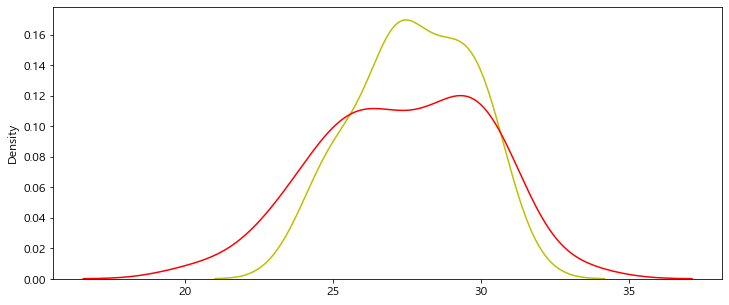

In [154]:
fig = plt.figure(figsize=(12, 5))

ax1 = sns.distplot(lr.predict(x_test), hist=False, color='y', label='Predicted Data')
ax2 = sns.distplot(y_test, hist=False,color='r', label='Actual Data', ax=ax1)

In [155]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12 
plt.rcParams['figure.figsize'] = (14,4)

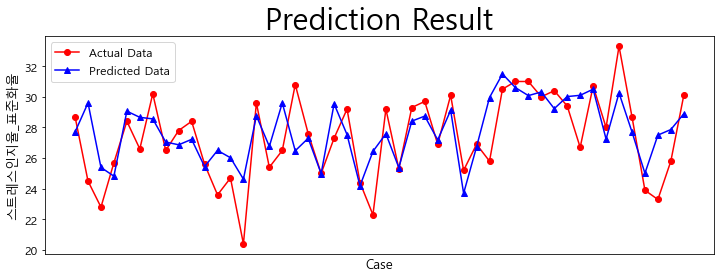

In [156]:
fig = plt.figure(figsize=(12, 4))
graph = fig.add_subplot(1,1,1)
graph.plot(y_test, marker='o', color='r', label='Actual Data')
graph.plot(lr.predict(x_test), marker='^', color='b', label='Predicted Data')
plt.xticks([])
graph.set_title('Prediction Result', size=30)
plt.xlabel("Case", fontsize=13)
plt.ylabel("스트레스인지율_표준화율", fontsize=13)
plt.legend()